# Выполнение ЛР №2:

## Подключение библиотек

In [1]:
import pandas               as pd
import numpy                as np

import matplotlib           as mpl
import matplotlib.pyplot    as mpl_plt
from   matplotlib.figure import Figure

import plotly               as plt
import plotly.graph_objs    as go

import seaborn              as sbn


## Настройка библиотек

In [2]:
mpl_plt.show()

pd.set_option('display.max_rows', None)

## 1. Matplotlib:

### Задание

* Получить  горизонтальную  столбиковую 
диаграмму для получения числа мужчин и женщин

### Решение

In [3]:
df_raw_csv = pd.read_csv('./Вариант 4/Mall_Customers.csv')
df_raw_csv.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
gender_counts = df_raw_csv['Gender'].value_counts()

# Строим горизонтальную столбиковую диаграмму
fig = Figure(figsize=(8, 4))

sub_plot = fig.add_subplot(1,1,1)

sub_plot.set_title('Распределение по полу среди клиентов')
sub_plot.xaxis.set_label_text("Возраст")
sub_plot.yaxis.set_label_text("Пол")

sub_plot.barh(gender_counts.index, gender_counts.values.tolist(), color=['lightpink', 'skyblue'])

sub_plot.xaxis.minorticks_on()
sub_plot.grid(axis='x')
sub_plot.grid(axis='x', which='minor', linestyle=':', linewidth=0.5)

### Визуализация

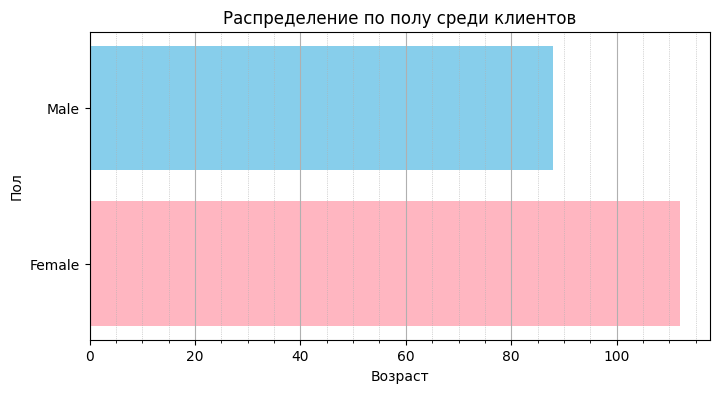

In [5]:
fig

In [6]:
pd.DataFrame(gender_counts)

,count
Gender,
Female,112
Male,88


### Анализ

На основании предоставленной визуализации можно сделать следующие выводы:

1. Соотношение полов среди клиентов неравномерное:

    * Женщины (Female) составляют большую часть клиентской базы. Их численность заметно выше, чем у мужчин.
    * Мужчины (Male) представлены в меньшем количестве, хотя их доля тоже значительна.

2. Абсолютные значения:

    * Количество женщин слегка превышает 110 единиц.
    * Количество мужчин находится примерно в диапазоне 85–90 единиц.

3. Вывод:

    * Женщины составляют доминирующую часть клиентской базы. Это важно учитывать при дальнейшем анализе поведения клиентов и планировании маркетинговых стратегий.

## 2. Plot.ly:

### Задание

* Показать связь между годовым доходом, возрастом 
и полом с помощью графика корреляции

### Решение

In [7]:


# Разделяет данные
df_male = df_raw_csv[df_raw_csv['Gender'] == 'Male']
df_female = df_raw_csv[df_raw_csv['Gender'] == 'Female']

# Линейная регрессия для мужчин
coef_male = np.polyfit(df_male['Age'], df_male['Annual Income (k$)'], 1)
line_male = np.poly1d(coef_male)
ages_male = np.linspace(df_male['Age'].min(), df_male['Age'].max(), 100)

# Линейная регрессия для женщин
coef_female = np.polyfit(df_female['Age'], df_female['Annual Income (k$)'], 1)
line_female = np.poly1d(coef_female)
ages_female = np.linspace(df_female['Age'].min(), df_female['Age'].max(), 100)

# График
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df_male['Age'], y=df_male['Annual Income (k$)'],
    mode='markers', name='Мужчины', marker=dict(color='blue')
))
fig.add_trace(go.Scatter(
    x=ages_male, y=line_male(ages_male),
    mode='lines', name='Регрессия: Мужчины', line=dict(color='blue', dash='dash')
))

fig.add_trace(go.Scatter(
    x=df_female['Age'], y=df_female['Annual Income (k$)'],
    mode='markers', name='Женщины', marker=dict(color='red')
))
fig.add_trace(go.Scatter(
    x=ages_female, y=line_female(ages_female),
    mode='lines', name='Регрессия: Женщины', line=dict(color='red', dash='dash')
))

fig.update_layout(
    title='Корреляция между возрастом и доходом по полу',
    xaxis_title='Возраст',
    yaxis_title='Годовой доход (тыс $)',
    template='plotly_white',
    height=600,
    legend=dict(
        x=0.75,           # по оси X (1 — край справа)
        y=1,           # по оси Y (1 — верх)
        xanchor='left',# якорь по X
        yanchor='bottom'  # якорь по Y
    ),
)
pass

### Визуализация

#### Вариант №1

In [8]:
fig.show()

#### Вариант №2

In [9]:
import plotly.express as px

fig = px.scatter(
    df_raw_csv,
    x="Age",
    y="Annual Income (k$)",
    color="Gender",  # разделение по полу, две серии на одном графике
    title="Зависимость дохода от возраста по полу",
    labels={"Age": "Возраст", "Annual Income (k$)": "Годовой доход (тыс $)", "Gender": "Пол"},
    template="plotly_white"
)
fig.show()

### Анализ

1. Краткий вывод:

    На графике нет выраженной зависимости между возрастом и годовым доходом ни у мужчин, ни у женщин — обе регрессии почти горизонтальны и лежат близко друг к другу. При этом наблюдается несколько явных выбросов по доходу.

1. Наблюдаемые паттерны:

    * **Слабая/нулевая корреляция по возрасту.** Оба тренда (штриховые линии) имеют практически нулевой наклон: возраст мало объясняет вариацию дохода.

    * **Большая дисперсия доходов в каждой возрастной точке.** Для одних и тех же возрастов доходы сильно варьируют (на графике — точки занимающие широкий вертикальный диапазон), что говорит о важности других факторов (образование, должность, отрасль и т.д.).

    * **Выбросы.** Есть отдельные высокодоходные наблюдения (до ≈120–140 тыс. $), больше заметные у мужчин в 30–35 лет и у женщин в других возрастах — они влияют на регрессию и могут искажать выводы.

    * **Сравнение полов.** Средние уровни дохода для мужчин и женщин примерно сопоставимы (регрессии проходят рядом друг с другом около 60 тыс. $), то есть гендерного разрыва по среднему доходу по возрасту на этом графике не видно.

## 3. Seaborn:

### Задание

* Показать  связь  между  возрастом,  годовым 
доходом, и скорингом расходов с помощью Pairplot

### Решение

Text(0.5, 1.02, 'Pairplot: Age, Annual Income, Spending Score')

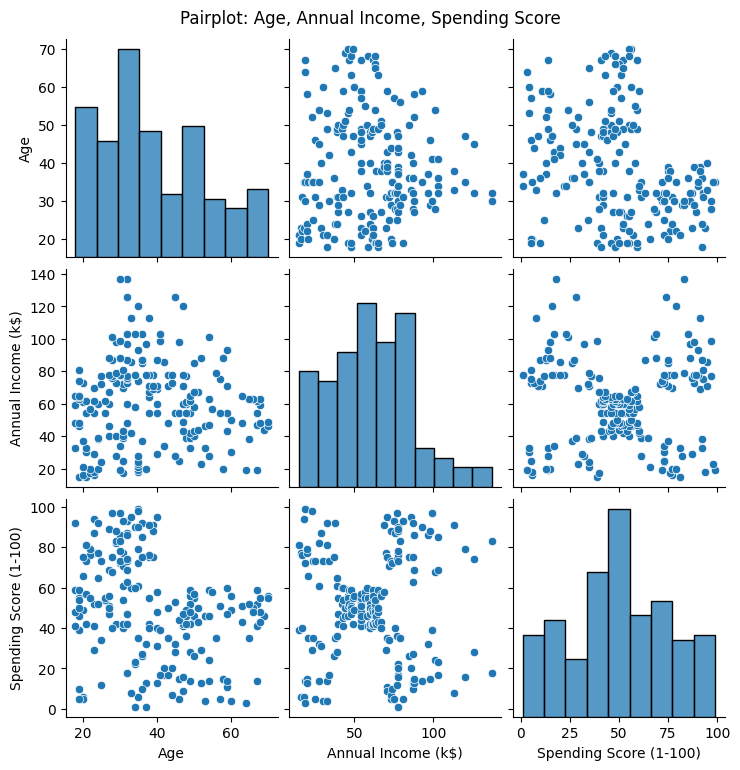

In [10]:
df_for_pairplot = df_raw_csv[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
plot = sbn.pairplot(df_for_pairplot)
plot.figure.suptitle("Pairplot: Age, Annual Income, Spending Score", y=1.02)

### Анализ

#### Распределение отдельных признаков (диагональные гистограммы)

* **Возраст (Age):**
    
    Распределение имеет пик в диапазоне 30–35 лет, что указывает на преобладание молодых и среднего возраста в выборке. Данные скошены влево: меньше людей старше 50 лет.
    
    *Вывод: Аудитория в основном состоит из людей трудоспособного возраста, что важно для сегментации по жизненным этапам.*

* **Годовой доход (Annual Income, $k):**
    
    Распределение сильно скошено влево. Большинство людей имеют доход до 60k$, резкий спад наблюдается после этого значения. Небольшая доля клиентов с доходом свыше 100k$.
    
    *Вывод: Основная масса аудитории — средний класс. Высокодоходные клиенты (свыше 100k$) составляют незначительную часть.*

* **Балл трат (Spending Score, 1–100):**
    
    Распределение близко к нормальному с пиком в районе 50 баллов. Меньше клиентов с экстремально низкими (0–20) или высокими (80–100) значениями.
    
    *Вывод: Большинство клиентов демонстрируют средний уровень трат, что может указывать на умеренные покупательские привычки.*


#### Взаимосвязи между признаками (графики рассеяния)

* **Возраст vs Годовой доход:**

    Отсутствует явная корреляция. Точки равномерно распределены, что означает:
    
    - Молодые люди (20–30 лет) могут иметь как низкий, так и высокий доход.
    - Старшие клиенты (50+) также представлены в разных доходных группах.
    
    *Вывод: Возраст не является определяющим фактором для дохода в этой выборке.*

* **Возраст vs Балл трат:**

    Наблюдается отрицательная тенденция:

    - Клиенты моложе 30 лет чаще имеют высокий балл трат (60–90).
    - В возрасте 30–50 лет баллы трат снижаются (20–60).
    - У клиентов старше 50 баллы слабо растут, но остаются ниже уровня молодых.

    *Вывод: Молодежь (до 30 лет) — ключевая целевая аудитория для маркетинга, так как они тратят больше.*

* **Годовой доход vs Балл трат:**

    Видны три основных кластера:
    
    1. Небольшой доход (20-40k$) с разбросанными тратами (как низкими, так и высокими)
        - Нет линейной зависимости: например, клиенты с доходом 30k$ могут иметь и 20, и 80 баллов.

    1. Средний доход (40–60k$) с средними тратами (40–60 баллов).

    1. Высокий доход (60–140k$) с разбросанными тратами (как низкими, так и высокими).
        - Так же как и первый кластер.
        
    *Вывод: Доход не напрямую влияет на уровень трат. Возможно, на них влияют другие факторы (например, семейное положение, жизненные цели и др.).*